# Name: Vinayak Ranshevare
Student Id: 101153659

In [8]:
!pip install ucimlrepo

In [9]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Data Preparation

In [10]:
# Function to preprocess the MNIST data
def preprocess_mnist_data(X, y):
    # Normalize the features
    X_normalized = X.astype('float32') / 255.0
    # Reshape the features for CNN input (assuming grayscale images)
    X_reshaped = X_normalized.reshape(-1, 28, 28, 1)
    # One-hot encode the labels
    y_encoded = to_categorical(y, num_classes=10)  # 10 classes for MNIST
    return X_reshaped, y_encoded

# Function to load MNIST dataset and reshape data
def load_data():
    # Load MNIST dataset
    mnist = fetch_openml(name='mnist_784', version=1)
    X, y = mnist.data, mnist.target

    # Convert DataFrame to NumPy array
    X = X.to_numpy()

    # Normalize the pixel values
    X = X / 255.0

    # Reshape images to (28, 28, 1) as required by CNN
    X = X.reshape(-1, 28, 28, 1)

    # Convert labels to one-hot encoded format
    label_binarizer = LabelBinarizer()
    y = label_binarizer.fit_transform(y)

    # Split the dataset into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    return X_train, y_train, X_val, y_val, X_test, y_test

# Convolutional Neural Network Architecture
# Max Pooling
# Fully Connected Layer and Softmax



In [11]:
# Function to build the CNN model
def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10 output classes for MNIST digits
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and Evaluation

In [12]:
# Function to train and evaluate the model
def train_and_evaluate(X_train, y_train, X_val, y_val):
    model = build_cnn_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
    history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])
    y_pred_prob = model.predict(X_val)
    y_pred = np.argmax(y_pred_prob, axis=1)
    accuracy = accuracy_score(np.argmax(y_val, axis=1), y_pred)
    print('Validation accuracy:', accuracy)
    return history, y_pred

def k_fold_cross_validation(X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        _, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test)
        accuracies.append(accuracy_score(np.argmax(y_test, axis=1), y_pred))
    avg_accuracy = np.mean(accuracies)
    print("Average Accuracy:", avg_accuracy)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Epoch 1/5
438/438 [==============================] - 54s 122ms/step - loss: 0.2013 - accuracy: 0.9420 - val_loss: 0.0874 - val_accuracy: 0.9743
Epoch 2/5
438/438 [==============================] - 42s 96ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0507 - val_accuracy: 0.9847
Epoch 3/5
438/438 [==============================] - 44s 99ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0427 - val_accuracy: 0.9873
Epoch 4/5
438/438 [==============================] - 46s 104ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 5/5
219/219 [==============================] - 2s 8ms/step
Validation accuracy: 0.9882857142857143
Epoch 1/5
350/350 [==============================] - 37s 100ms/step - loss: 0.2405 - accuracy: 0.9323 - val_loss: 0.0749 - val_accuracy: 0.9768
Epoch 2/5
350/350 [==============================] - 39s 111ms/step - loss: 0.0615 - accuracy: 0.9811 - val_loss: 0.0509 - val_accuracy: 0.9849
Epoch 3/5
350/350 [==============

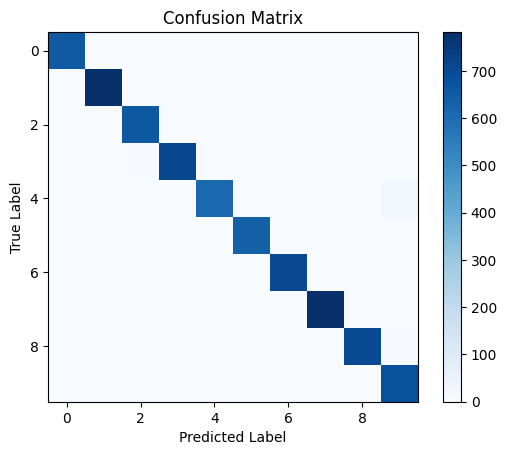

In [13]:
# Main Function
def main():
    # Load the MNIST data
    (X, y), (X_test, y_test) = mnist.load_data()

    #/ Load data
    X_train, y_train, X_val, y_val, X_test, y_test = load_data()

    #/ Train and evaluate the model
    history, y_pred = train_and_evaluate(X_train, y_train, X_val, y_val)

    #k_fold_cross_validation(X_train, np.argmax(y_train, axis=1))
    k_fold_cross_validation(X_train, y_train)

    # Plot confusion matrix
    plot_confusion_matrix(np.argmax(y_val, axis=1), y_pred)

if __name__ == "__main__":
    main()

# CNN Architecture
The `build_cnn_model` function defines the CNN architecture using Keras Sequential API. Here's a breakdown of the architecture:
1. **Input Layer**:
   - The input layer takes the input images, which are grayscale images of handwritten digits from the MNIST dataset.
   - The images have a size of 28x28 pixels, represented as (28, 28, 1) where 1 indicates the single color channel (grayscale).

2. **Convolutional Layers**:
   - The model consists of two convolutional layers followed by max-pooling layers.
   - The first convolutional layer has 32 filters/kernels of size 3x3. It applies these filters to the input images to extract features.
   - The second convolutional layer has 64 filters/kernels of size 3x3. This layer further extracts higher-level features from the outputs of the first convolutional layer.
   - ReLU activation functions are applied after each convolutional layer to introduce non-linearity to the model.

3. **Max Pooling Layers**:
   - After each convolutional layer, a max-pooling layer with a pool size of 2x2 is applied.
   - Max pooling reduces the spatial dimensions of the feature maps while retaining the most important information.

4. **Flatten Layer**:
   - After the convolutional layers, a flatten layer is used to convert the 2D feature maps into a 1D vector.
   - This flattening step is necessary to connect the convolutional layers to the fully connected layers.

5. **Fully Connected Layers**:
   - Following the flatten layer, there are two fully connected dense layers.
   - The first dense layer consists of 128 neurons and applies the ReLU activation function.
   - The second dense layer is the output layer with 10 neurons (one for each digit class) and uses the softmax activation function.
   - Softmax converts the raw output scores into probability values, representing the likelihood of each class.

6. **Output Layer**:
   - The output layer produces a probability distribution over the 10 digit classes (0-9).
   - During inference, the digit with the highest probability is selected as the predicted class.

7. **Compilation**:
   - The model is compiled with the Adam optimizer and categorical cross-entropy loss function.
   - Adam is an adaptive learning rate optimization algorithm that adjusts the learning rate during training.
   - Categorical cross-entropy is a common loss function used for multi-class classification problems.

This CNN architecture follows a typical pattern of alternating convolutional layers for feature extraction and max pooling layers for downsampling, followed by fully connected layers for classification. The ReLU activation is used in the convolutional and dense layers to introduce non-linearity, while the softmax activation is used in the final layer for multi-class classification.

Overall, this CNN architecture is designed to efficiently learn and extract features from the MNIST dataset, ultimately achieving high accuracy in digit recognition.